## Contexte

Vous êtes data scientist/data analyst dans une banque et votre entreprise souhaite analyser l'efficacité des campagnes de marketing direct basées sur les appels téléphoniques.

L'objectif est de déterminer si ces campagnes influencent positivement la souscription des clients à des dépôts à terme.

Pour cela, vous disposez de quatre ensembles de données détaillant les interactions avec les clients sur une période allant de mai 2008 à novembre 2010.

## Objectif

Votre mission consiste à effectuer une analyse exploratoire des données pour identifier les tendances, les comportements des clients, et d'autres insights pertinents qui peuvent aider la banque à optimiser ses futures campagnes de marketing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importation des données
df =  pd.read_csv("donnees_marketing_banque.csv", delimiter=";")
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,id45208,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,id45209,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,id45210,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
# Verification des types de variable
df.dtypes

id            object
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [9]:
# Description rapide de la base de données
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45206.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.931477,1362.403707,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.623372,3044.906741,8.322476,257.527812,3.098021,100.128746,2.303441
min,10.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# Ajout des variables qualitatives
df.describe(include="all")

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211,45211.000000,45211,45211,45211,45211,45206.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,45211,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,id1,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,1,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,NaN,40.931477,NaN,NaN,NaN,NaN,1362.403707,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,NaN,10.623372,NaN,NaN,NaN,NaN,3044.906741,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,NaN,10.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,NaN,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,NaN,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
# Conservation des clients majeurs
df_major = df[df["age"] >= 18]
years = df_major["age"]
df_major.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45203.000000,45198.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000
mean,40.936133,1362.631997,15.808331,258.168816,2.764153,40.205119,0.580426
std,10.618494,3045.126997,8.321971,257.548471,3.098206,100.136106,2.303632
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Variable quantitative

## Utilisation de Matplotlib

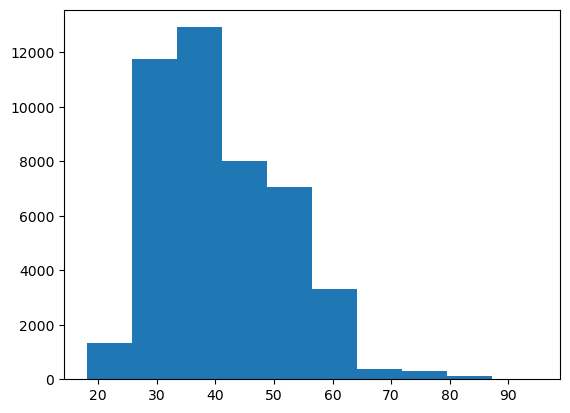

In [50]:
# histogramme de la variable age
plt.hist(years)
plt.show()

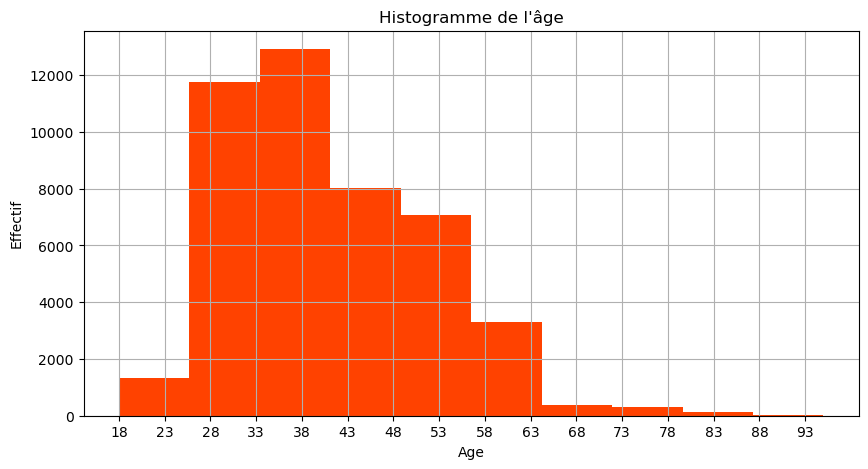

In [98]:
# personnalisation: couleur, titre des axes et du graphique, gride, taille de la figure, modification de l'intervalle et
# enregistrement de la figure
plt.figure(figsize=(10, 5))
color = "#FF4200"
plt.hist(years, color=color)
plt.title("Histogramme de l'âge")
plt.xlabel("Age")
plt.ylabel("Effectif") 
plt.grid()
plt.xticks(range(18, 95, 5))
plt.savefig("graphique.png")
plt.show()

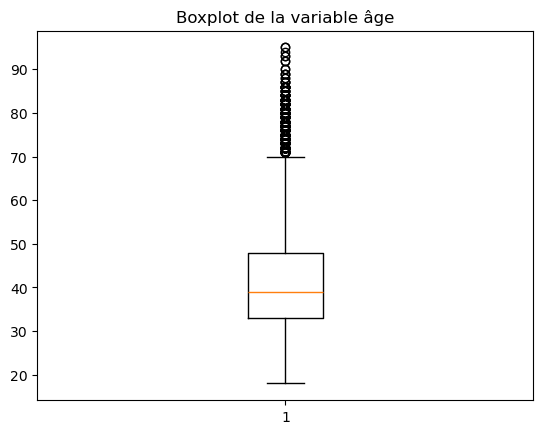

In [56]:
# boxplot de la variable quantitative âge
plt.boxplot(years)
plt.title("Boxplot de la variable âge")
plt.show()

## Utilisation de seaborn

In [5]:
# importation de seaborn
import seaborn as sns

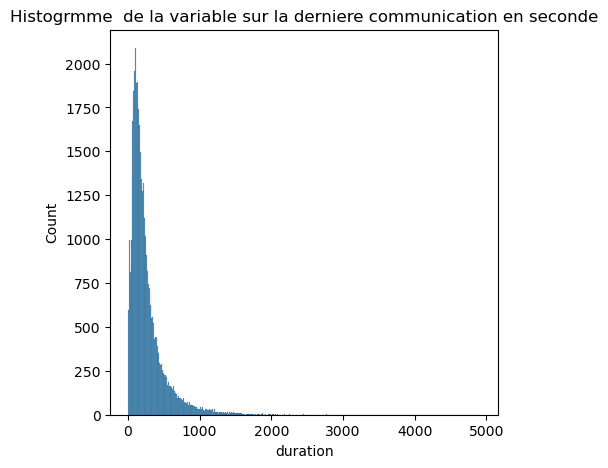

In [80]:
# histogramme durée de la dernier communication en seconds
durations = df_major["duration"]
plt.figure(figsize=(5, 5))
sns.histplot(durations)
plt.title("Histogrmme  de la variable sur la derniere communication en seconde")
plt.show()

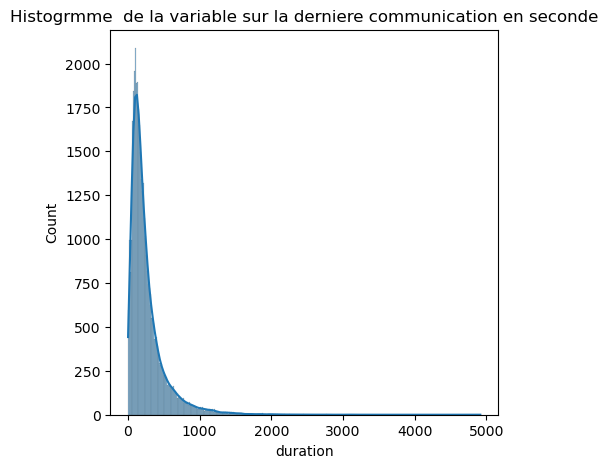

In [82]:
# ajout de la courbe de densité 
plt.figure(figsize=(5, 5))
sns.histplot(duarations, kde=True)
plt.title("Histogrmme  de la variable sur la derniere communication en seconde")
plt.show()

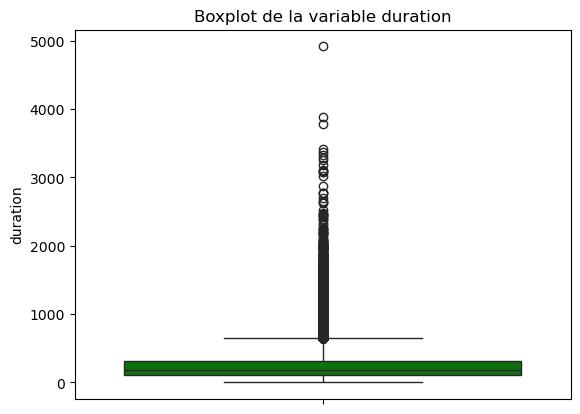

In [90]:
# Boxplot
sns.boxplot(durations, color=color)
plt.title("Boxplot de la variable duration")
plt.show()

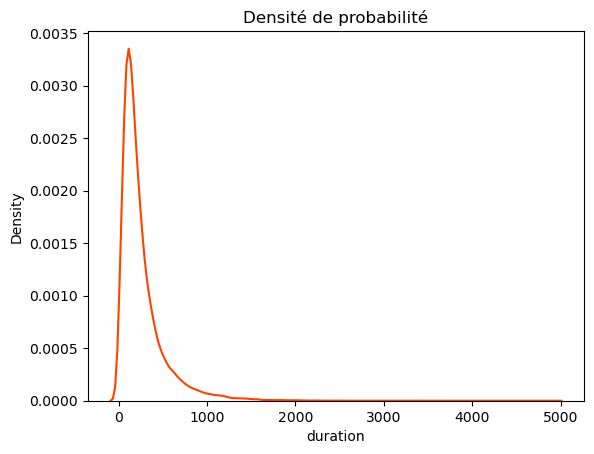

In [102]:
# courbe de densité
sns.kdeplot(durations, color=color)
plt.title("Densité de probabilité")
plt.show()

# Variable qualitative

## Utilisation de Matplotlib

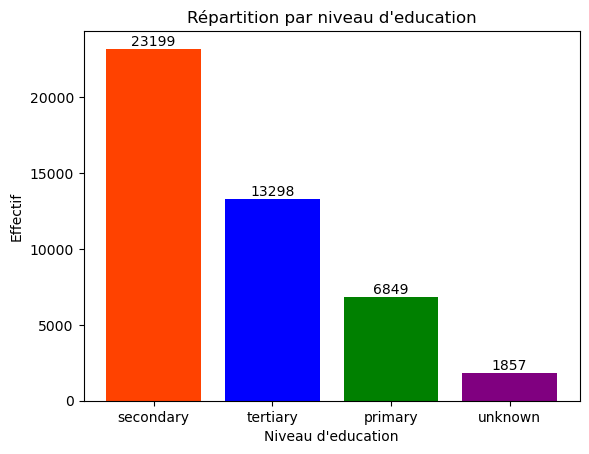

In [132]:
# Diagramme à barre pour la variable "education"
effectif = df_major["education"].value_counts().reset_index() # Dataframe
colors = [color, "blue", "green", "purple"]
plt.bar(effectif["education"], effectif["count"], color= colors)
# ajout des valeurs sur chaque barre
for i, freq in enumerate(effectif["count"]):
    plt.text(i, freq, str(freq), ha='center', va= 'bottom')
plt.title("Répartition par niveau d'education")
plt.xlabel("Niveau d'education")
plt.ylabel("Effectif")
plt.show()

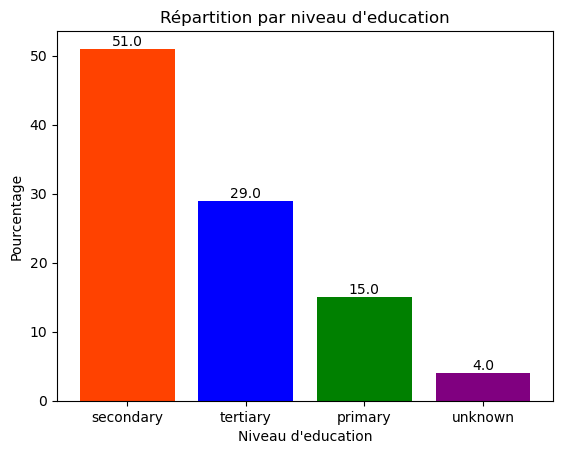

In [142]:
# Diagramme à barre pour la variable "education" en utilisant les proposition
effectif["proportion"] = round(100*effectif["count"]/effectif["count"].sum())
colors = [color, "blue", "green", "purple"]
plt.bar(effectif["education"], effectif["proportion"], color= colors)
# ajout des valeurs sur chaque barre
for i, freq in enumerate(effectif["proportion"]):
    plt.text(i, freq, str(freq), ha='center', va= 'bottom')
plt.title("Répartition par niveau d'education")
plt.xlabel("Niveau d'education")
plt.ylabel("Pourcentage")
plt.show()

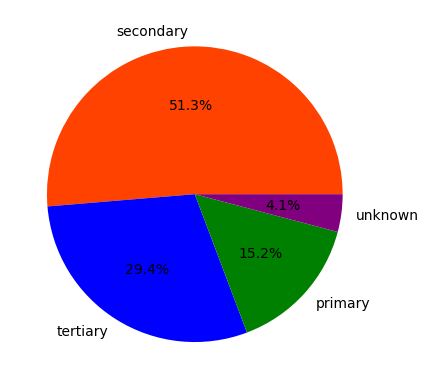

In [162]:
# realisation d'un pie chart
plt.pie(effectif["count"], labels= effectif["education"], autopct="%.1f%%", colors=colors)
plt.show()

## Utilisation de seaborn

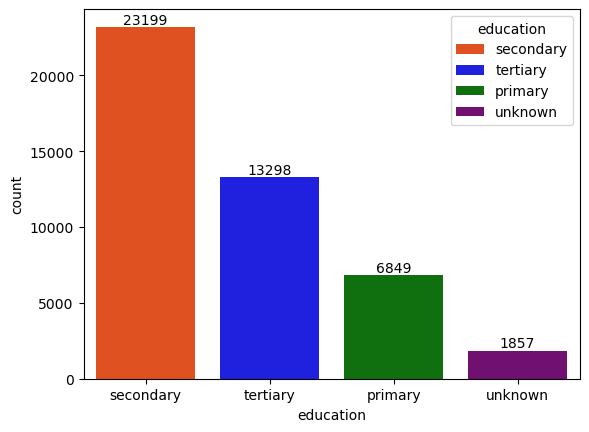

In [182]:
sns.barplot(x="education", y="count", data=effectif,hue="education", palette=colors, legend=True)
for i, freq in enumerate(effectif["count"]):
    plt.text(i, freq, str(freq), ha='center', va= 'bottom')
plt.show()

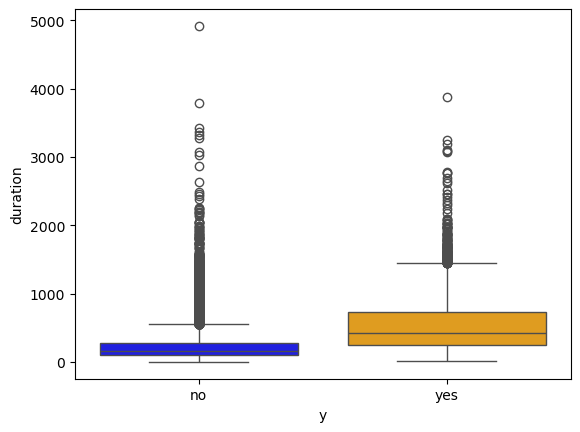

In [19]:
# relation entre le fait de souscrire au depot et la durée 
sns.boxplot(x="y", y="duration", data=df_major, palette=["blue", "orange"], hue="y")
plt.show()

In [21]:
# relation entre le fait de souscrire au depot et le niveau d'education 
# tableau croisé
table_contingence = pd.crosstab(df_major['y'], df_major['education'])
table_contingence

education,primary,secondary,tertiary,unknown
y,,,,
no,6258,20749,11302,1605
yes,591,2450,1996,252


<Axes: xlabel='y', ylabel='count'>

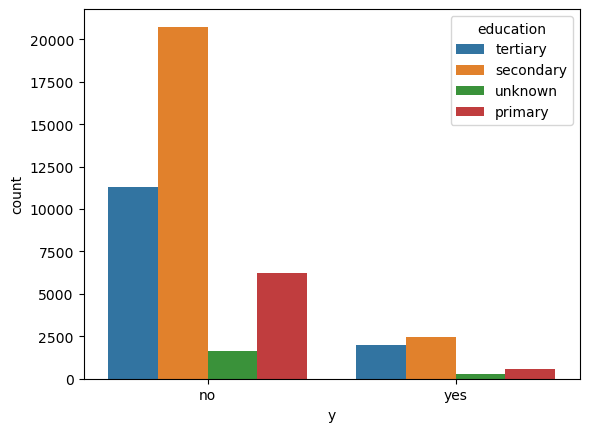

In [25]:
# faire le countplot
sns.countplot(x='y', hue='education', data=df_major)

In [35]:
# Representatation en terme de proportion
prop_table = df_major.groupby("y")["education"].value_counts(normalize=True).reset_index(name= "proportion")
prop_table

,y,education,proportion
0,no,secondary,0.519843
1,no,tertiary,0.283159
2,no,primary,0.156787
3,no,unknown,0.040211
4,yes,secondary,0.463226
5,yes,tertiary,0.377387
6,yes,primary,0.111741
7,yes,unknown,0.047646


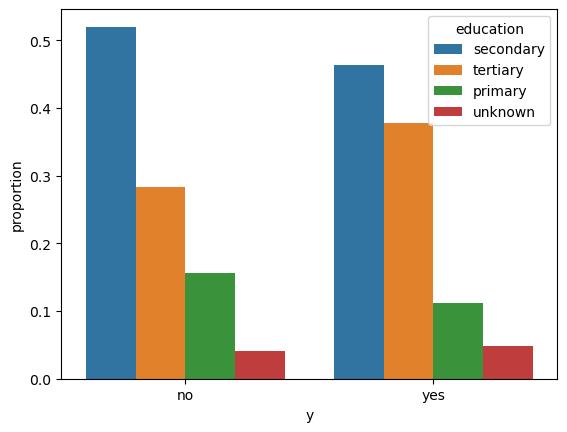

In [41]:
sns.barplot(x="y", y="proportion", hue="education", data= prop_table)
plt.show()

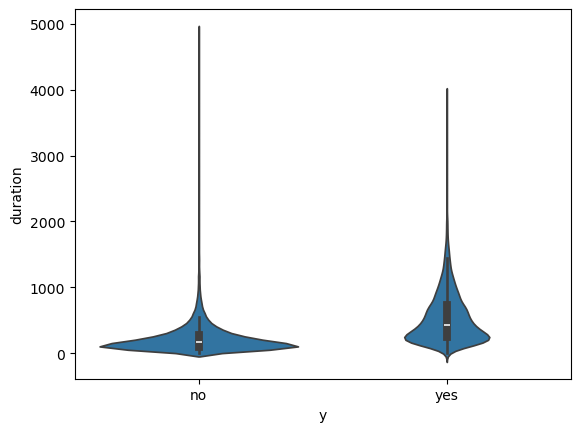

In [53]:
sns.violinplot(x="y", y="duration", data= df_major)
plt.show()

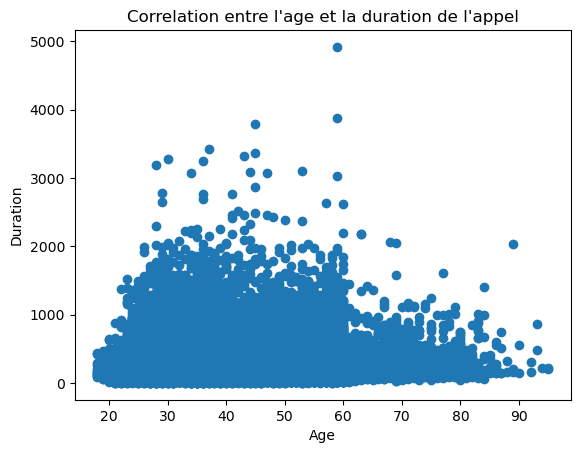

In [63]:
# relation entre la variable 'age' et 'duration' (nuage de point)
plt.scatter(df_major["age"], df_major["duration"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.title("Correlation entre l'age et la duration de l'appel")
plt.show()

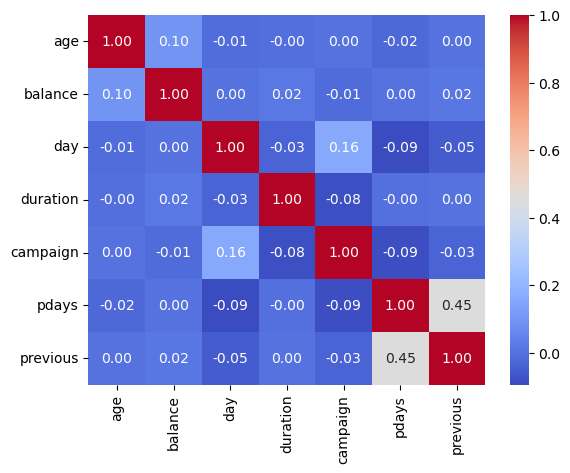

In [89]:
# heatmap de correlation entre les variables quantitatives
var_quantitatives = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
df_quanti = df_major[var_quantitatives]
matrice = df_quanti.corr() # matrice de correlation
sns.heatmap(df_quanti.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

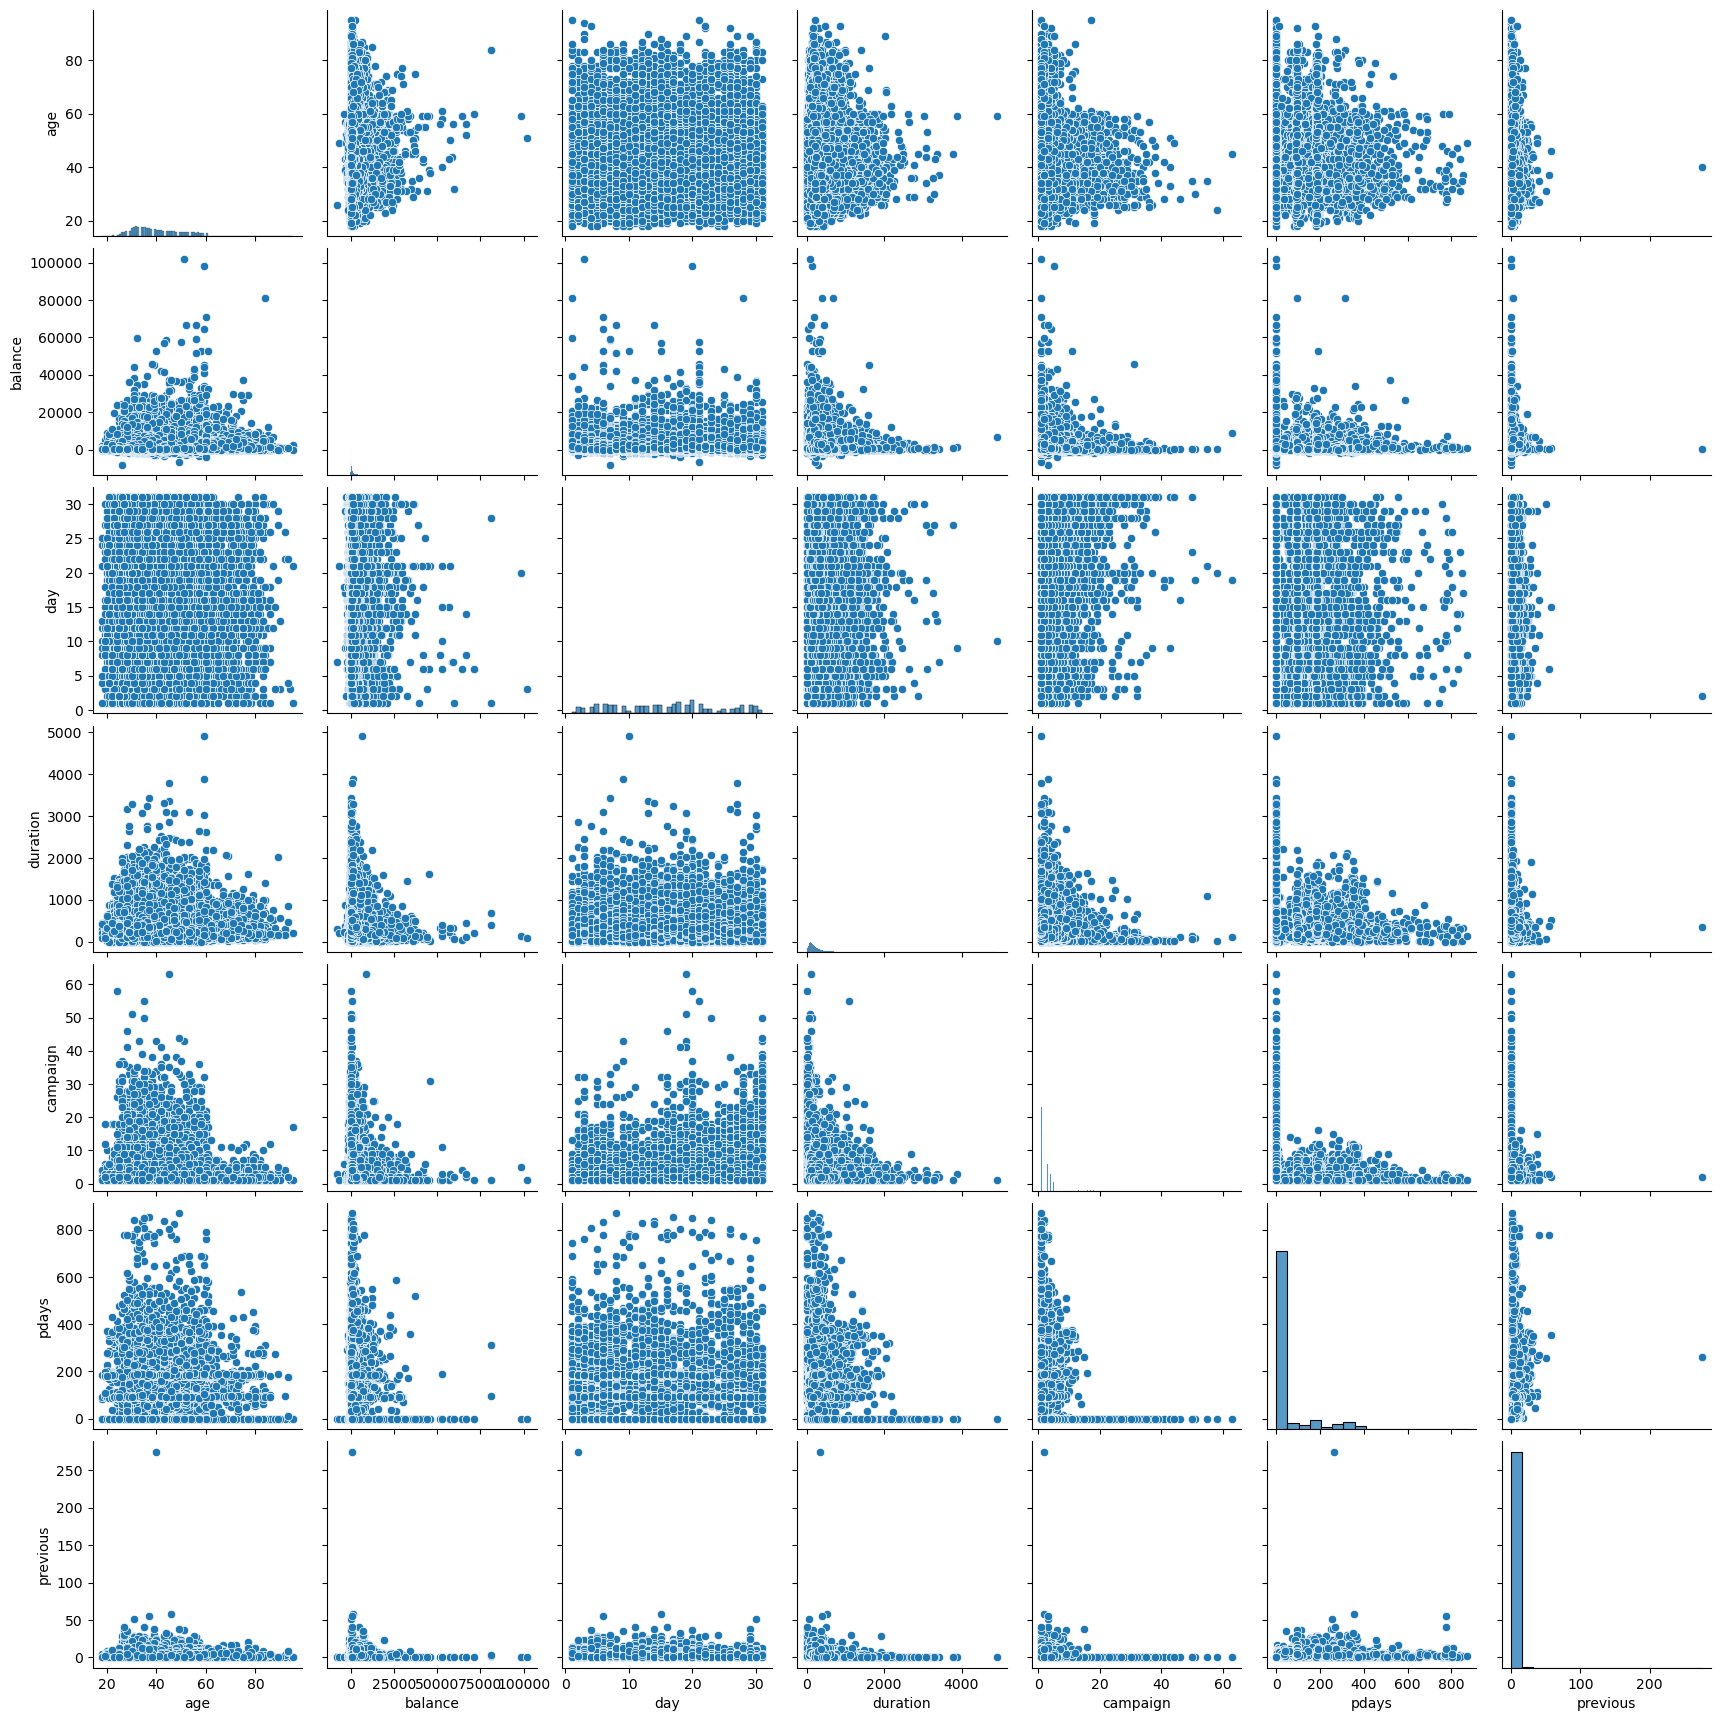

In [95]:
# relation entre les differentes variables
sns.pairplot(df_major)
plt.show()

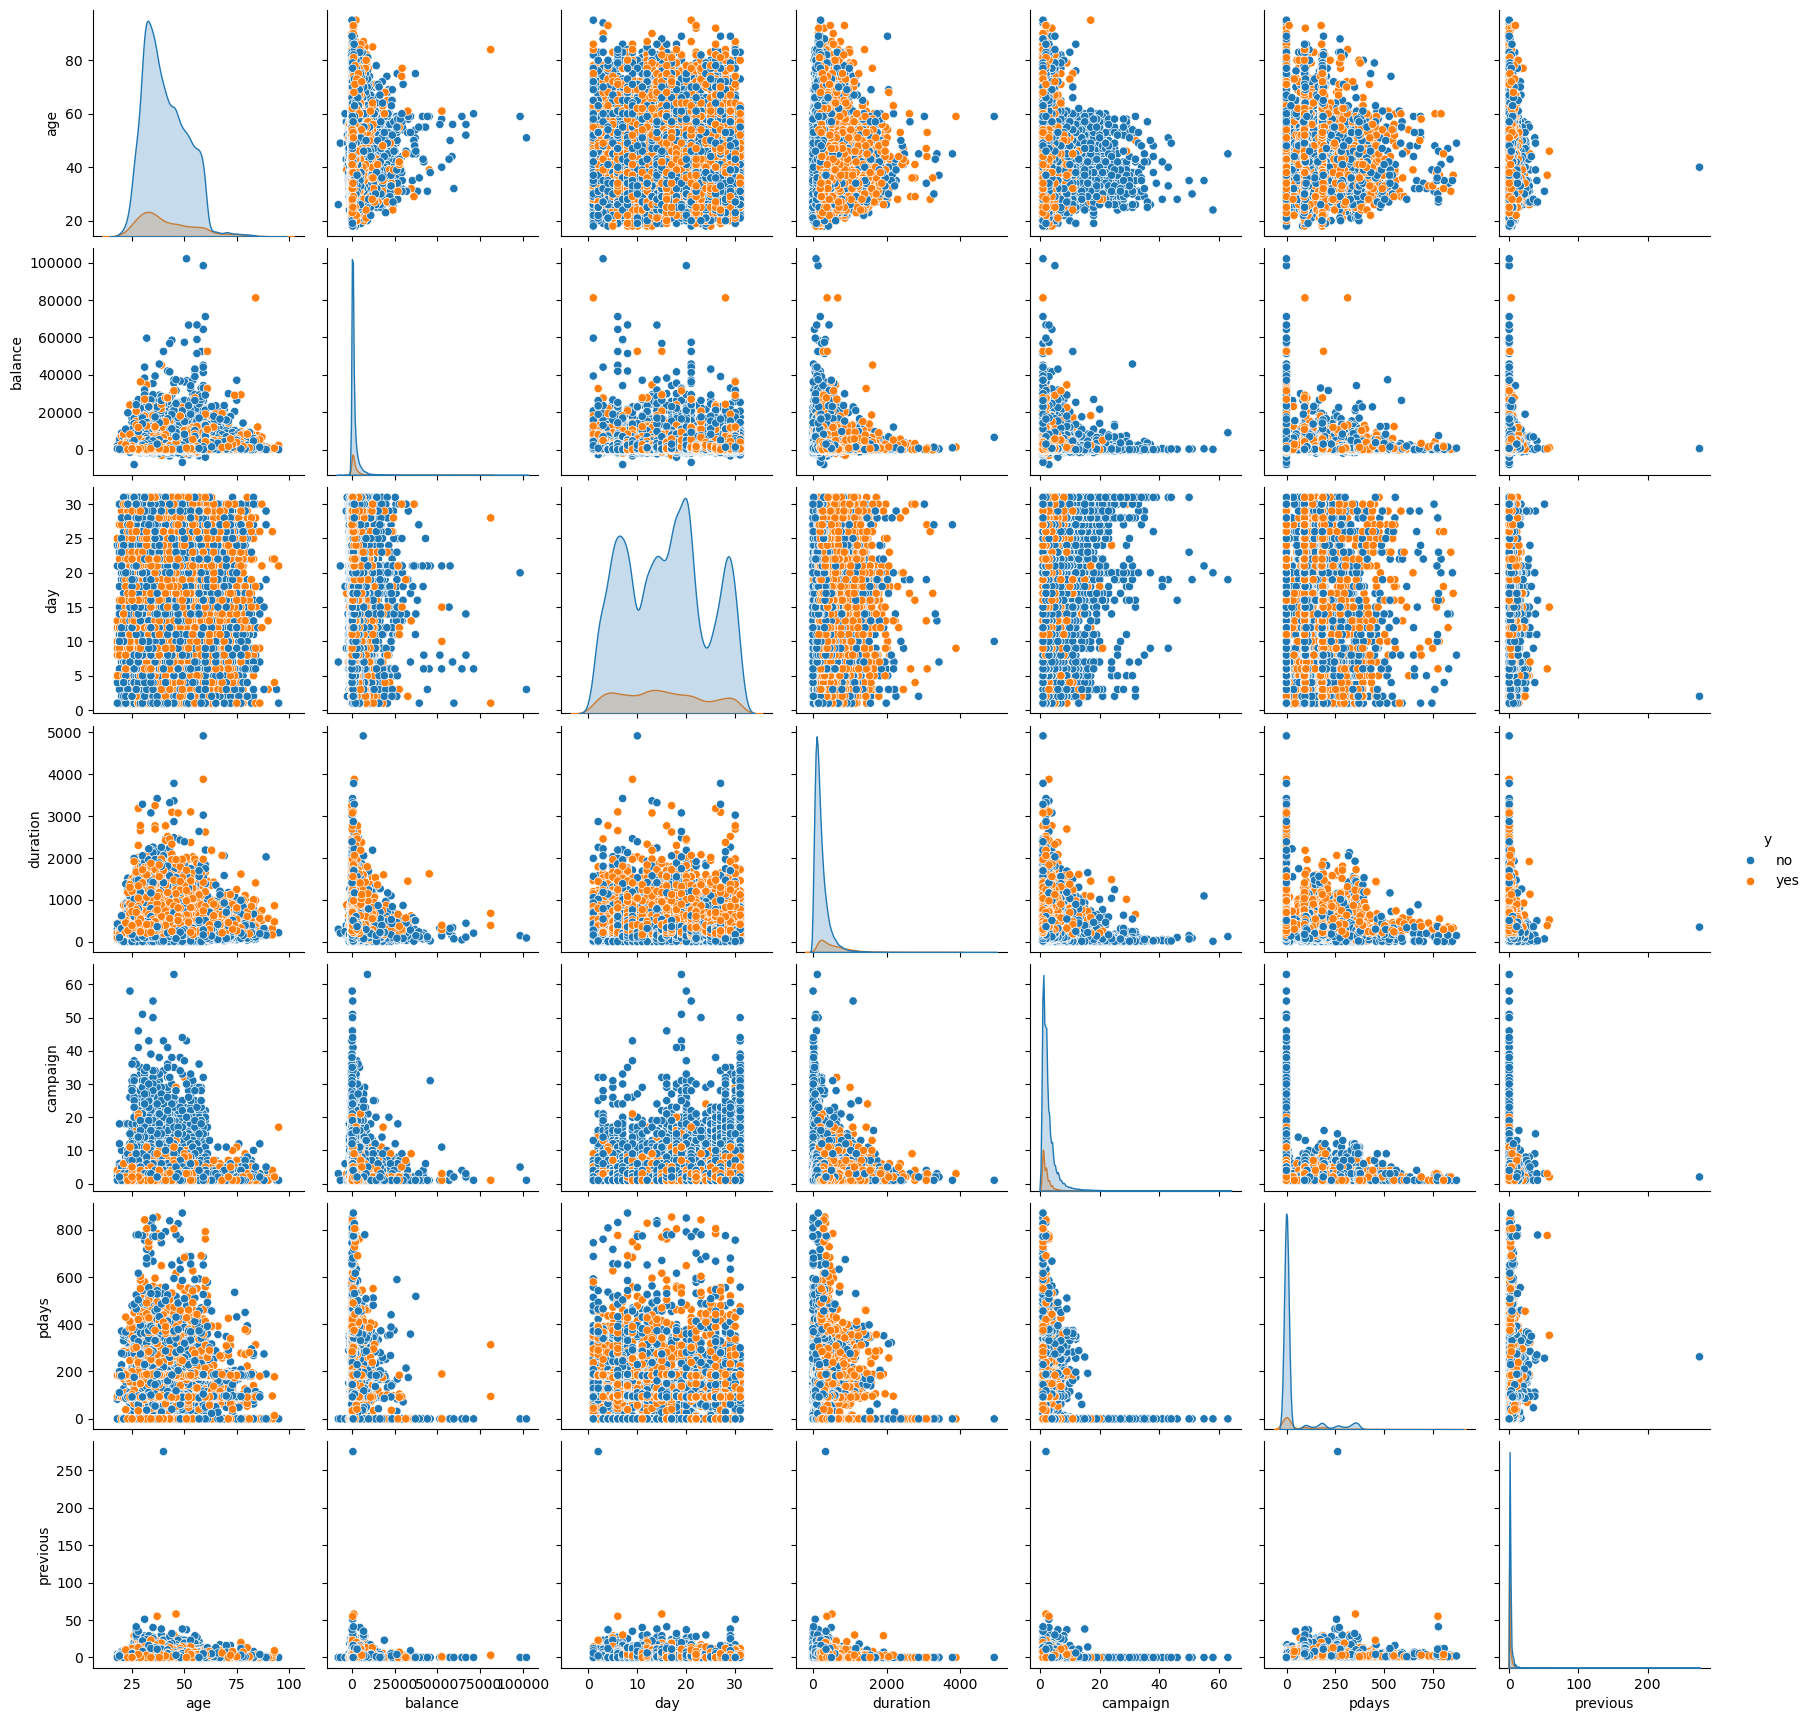

In [99]:
# relation entre les variables et la variable 'y'
sns.pairplot(data=df_major, hue="y")
plt.show()